<a href="https://colab.research.google.com/github/JoaoGabini/IA_Treino/blob/main/Classifica%C3%A7%C3%A3o_de_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

url = 'https://github.com/JoaoGabini/IA_Treino/raw/refs/heads/main/sentimentos1.xlsx'
base = pd.read_excel(url)
base = sklearn.utils.shuffle(base)
base

,frase,sentimento
342,É revoltante como as coisas acontecem comigo.,raiva
550,"É sempre a mesma enrolação, e nada se resolve.",raiva
869,Ela se foi e levou com ela uma parte do meu co...,tristeza
150,seja cuidadoso com os meus sentimentos,alegria
721,Que desgosto ver tanta injustiça rolando impune.,raiva
...,...,...
588,Ver meus pais orgulhosos foi o melhor presente...,alegria
815,Dormir sozinho agora só reforça o quanto tudo ...,tristeza
28,eu adorei este perfume,alegria
334,"Não consegui dormir, preocupado com tudo ao me...",medo


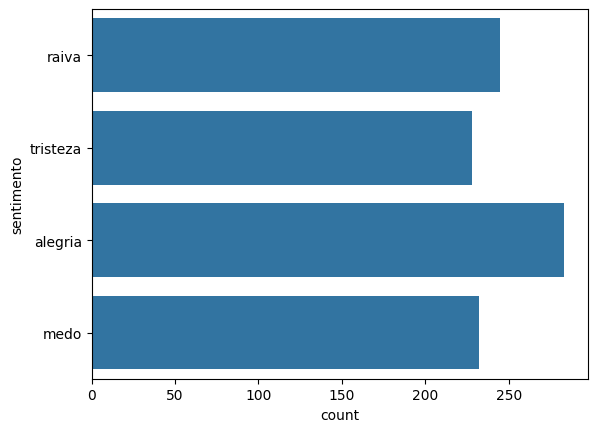

In [ ]:
import seaborn as sns
sns.countplot(base['sentimento'], label = 'Contagem');

In [ ]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

!python -m spacy download pt_core_news_sm
nlp = spacy.load("pt_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 7.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
sentimentos = base['sentimento'].unique()
print(sentimentos)

['raiva' 'tristeza' 'alegria' 'medo']


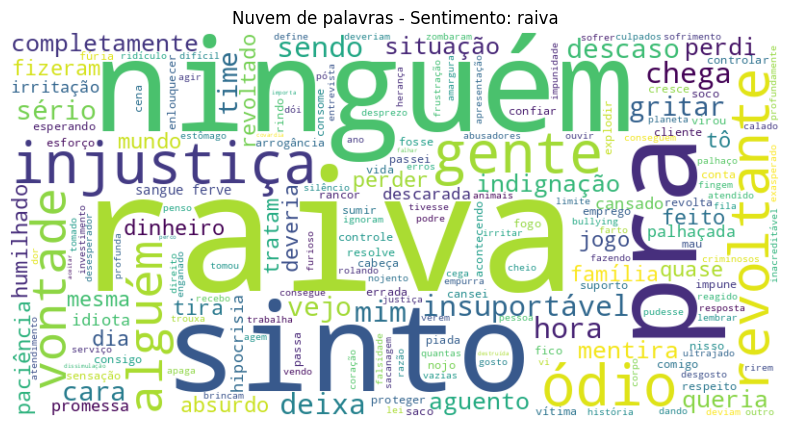

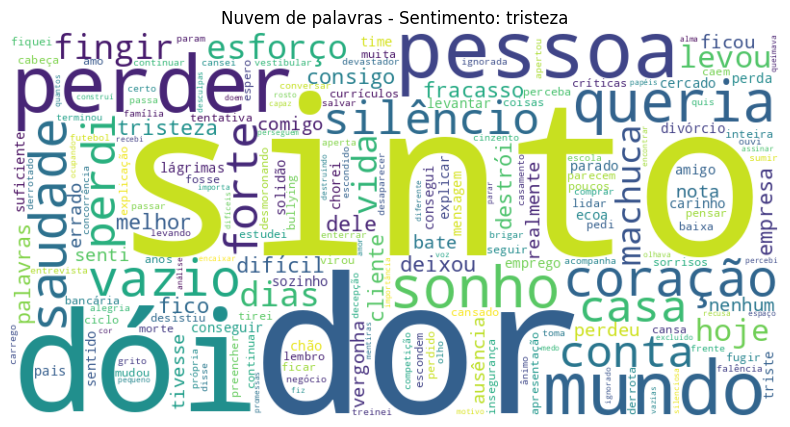

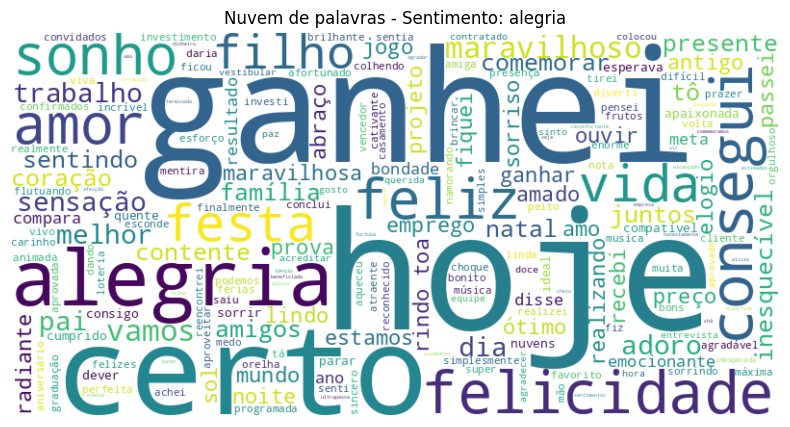

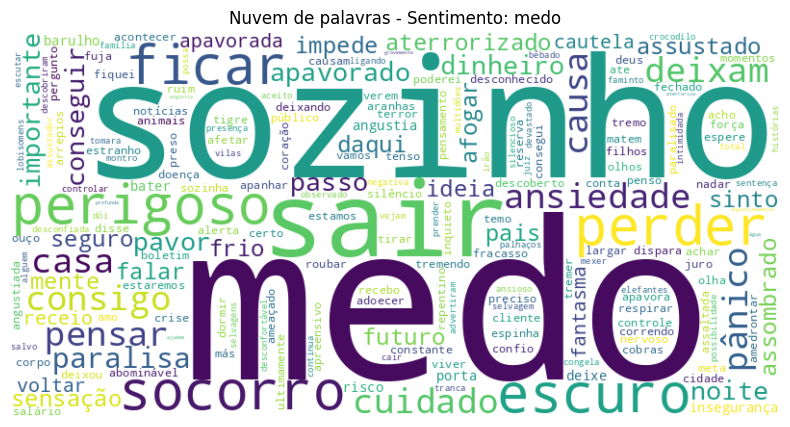

In [ ]:
for sentimento in sentimentos:
  frases= base[base['sentimento'] == sentimento]['frase']
  texto = " ".join(frases)
  doc = nlp(texto)
  palavras_sem_stopwords = []
  for token in doc:
      if not token.is_stop and not token.is_punct and not token.is_space:
          palavras_sem_stopwords.append(token.text.lower())

  texto_limpo = " ".join(palavras_sem_stopwords)
  nuvem = WordCloud(width=800, height=400, background_color='white').generate(texto_limpo)
  plt.figure(figsize=(10,5))
  plt.imshow(nuvem, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Nuvem de palavras - Sentimento: {sentimento}')
  plt.show()

  minhas_stopwords = ["ninguém", "deu", "fico", "mim", "pra", "queria", "gente", "deixa", "vou", "chega", "sinto", "tô", "hoje", "finalmente", "tratam", "dia", "deveria", "quase", "cabe", "situação", "tô", "há", "mim", "outro", "vou", "tira", "consegue", "vejo", "cara", "alguém", "papel", "pó", "vi", "sala", "algum", "enche", "vontade", "completamente", "sendo", " "]
  for palavra in minhas_stopwords:
    nlp.vocab[palavra].is_stop = True

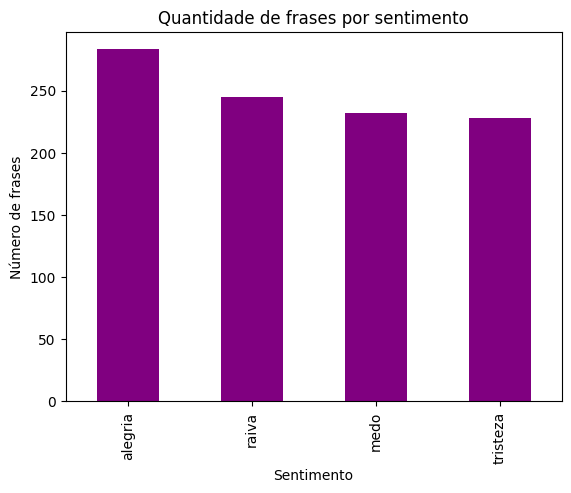

In [ ]:
base['sentimento'].value_counts().plot(kind='bar', color='purple')
plt.title("Quantidade de frases por sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Número de frases")
plt.show()

In [ ]:
from collections import Counter

for sentimento in sentimentos:
  frases = base[base['sentimento'] == sentimento]['frase']
  texto = " ".join(frases)
  doc = nlp(texto)
  palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
  contagem = Counter(palavras).most_common(10)

  print(f"\nPalavras mais comuns em: {sentimento}")
  for palavra, freq in contagem:
    print(f"{palavra}: {freq}")


Palavras mais comuns em: raiva
raiva: 26
injustiça: 10
ódio: 10
revoltante: 9
insuportável: 6
descaso: 5
sério: 5
gritar: 5
time: 5
ferve: 5

Palavras mais comuns em: tristeza
sinto: 15
dor: 11
dói: 8
perder: 8
mundo: 7
queria: 7
coração: 6
vazio: 6
silêncio: 5
perdi: 5

Palavras mais comuns em: alegria
hoje: 11
ganhei: 10
certo: 10
alegria: 10
felicidade: 9
consegui: 9
amor: 8
feliz: 8
festa: 7
sonho: 7

Palavras mais comuns em: medo
medo: 16
sozinho: 8
sair: 7
socorro: 7
perder: 7
ficar: 7
escuro: 7
perigoso: 6
ansiedade: 5
consigo: 5


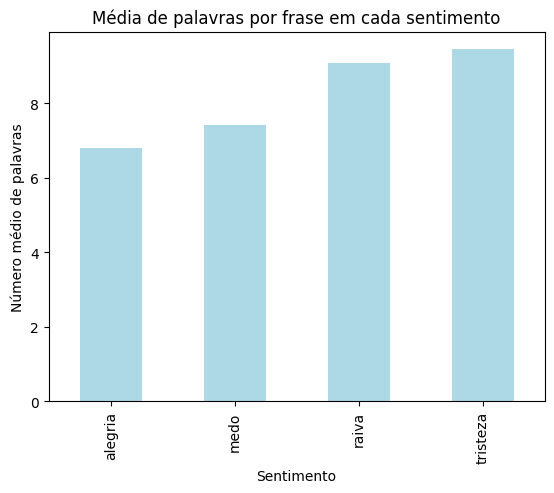

In [ ]:
base['n_palavras'] = base['frase'].apply(lambda x: len(x.split()))
media_palavras = base.groupby('sentimento')['n_palavras'].mean()

media_palavras.plot(kind='bar', color='lightblue')
plt.title("Média de palavras por frase em cada sentimento")
plt.ylabel("Número médio de palavras")
plt.xlabel("Sentimento")
plt.show()

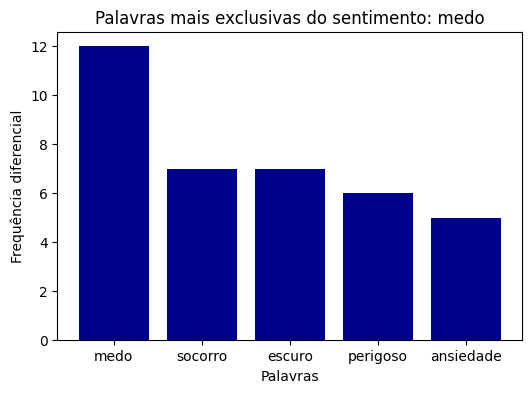

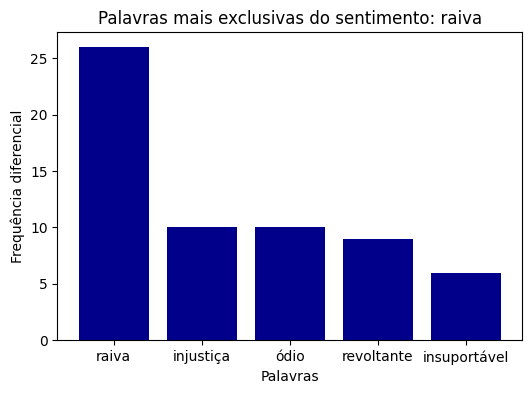

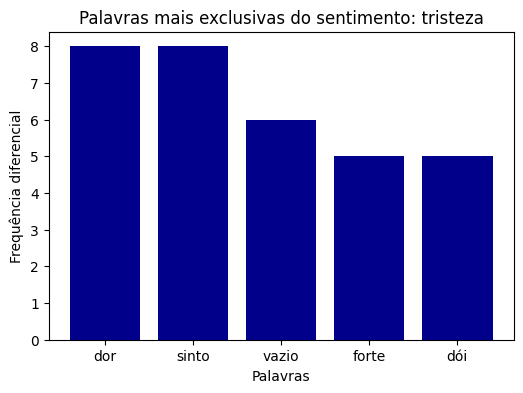

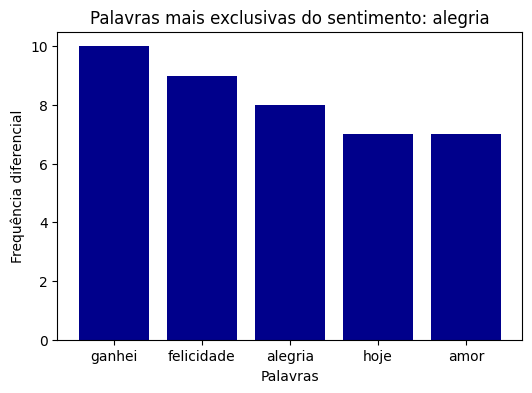

In [ ]:
sentimentos = ['medo', 'raiva', 'tristeza', 'alegria']
palavras_por_sentimento = {}

for sentimento in sentimentos:
    frases = base[base['sentimento'] == sentimento]['frase']
    texto = " ".join(frases)
    doc = nlp(texto)

    palavras = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    contagem = Counter(palavras)
    palavras_por_sentimento[sentimento] = contagem

for sentimento in sentimentos:
    outras = [s for s in sentimentos if s != sentimento]

    palavras_sent = palavras_por_sentimento[sentimento]
    palavras_outros = Counter()
    for outro in outras:
        palavras_outros += palavras_por_sentimento[outro]

    diferencas = {}
    for palavra in palavras_sent:
        freq_atual = palavras_sent[palavra]
        freq_outros = palavras_outros.get(palavra, 0)
        diferenca = freq_atual - freq_outros
        if diferenca > 0:
            diferencas[palavra] = diferenca

    top_exclusivas = sorted(diferencas.items(), key=lambda x: x[1], reverse=True)[:5]
    palavras = [item[0] for item in top_exclusivas]
    valores = [item[1] for item in top_exclusivas]

    plt.figure(figsize=(6, 4))
    plt.bar(palavras, valores, color='darkblue')
    plt.title(f'Palavras mais exclusivas do sentimento: {sentimento}')
    plt.ylabel('Frequência diferencial')
    plt.xlabel('Palavras')
    plt.show()

#Treino

In [ ]:
for sentimento in sentimentos:
    frase = base[base['sentimento'] == sentimento].sample(1)['frase'].values[0]
    print(f"{sentimento.upper()}: {frase}")

MEDO: Às vezes me pergunto se estou mesmo no caminho certo.
RAIVA: O sangue ferve toda vez que vejo essa impunidade.
TRISTEZA: Parece que tudo que eu amo vai embora.
ALEGRIA: a brisa esta agradável hoje


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frases = base[['frase']]
sentimento = base['sentimento'].values

frases.head()

,frase
342,É revoltante como as coisas acontecem comigo.
550,"É sempre a mesma enrolação, e nada se resolve."
869,Ela se foi e levou com ela uma parte do meu co...
150,seja cuidadoso com os meus sentimentos
721,Que desgosto ver tanta injustiça rolando impune.


In [ ]:
def limpatexto(texto):
  doc= nlp(texto)
  palavras= [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
  return " ".join(palavras)

base['fraselimpa'] = base['frase'].apply(limpatexto)
base

,frase,sentimento,n_palavras,fraselimpa
342,É revoltante como as coisas acontecem comigo.,raiva,7,revoltante coisas acontecem comigo
550,"É sempre a mesma enrolação, e nada se resolve.",raiva,9,mesma enrolação resolve
869,Ela se foi e levou com ela uma parte do meu co...,tristeza,12,levou coração
150,seja cuidadoso com os meus sentimentos,alegria,6,seja cuidadoso sentimentos
721,Que desgosto ver tanta injustiça rolando impune.,raiva,7,desgosto injustiça rolando impune
...,...,...,...,...
588,Ver meus pais orgulhosos foi o melhor presente...,alegria,10,pais orgulhosos melhor presente
815,Dormir sozinho agora só reforça o quanto tudo ...,tristeza,9,dormir sozinho reforça mudou
28,eu adorei este perfume,alegria,4,adorei perfume
334,"Não consegui dormir, preocupado com tudo ao me...",medo,9,consegui dormir preocupado redor


In [ ]:
sentimento

array(['raiva', 'raiva', 'tristeza', 'alegria', 'raiva', 'raiva', 'raiva',
       'medo', 'tristeza', 'alegria', 'tristeza', 'raiva', 'raiva',
       'alegria', 'tristeza', 'tristeza', 'medo', 'tristeza', 'tristeza',
       'raiva', 'tristeza', 'raiva', 'alegria', 'tristeza', 'medo',
       'raiva', 'alegria', 'tristeza', 'tristeza', 'raiva', 'raiva',
       'tristeza', 'alegria', 'alegria', 'raiva', 'alegria', 'alegria',
       'medo', 'alegria', 'tristeza', 'alegria', 'tristeza', 'tristeza',
       'tristeza', 'raiva', 'alegria', 'tristeza', 'raiva', 'raiva',
       'medo', 'alegria', 'alegria', 'medo', 'medo', 'medo', 'raiva',
       'alegria', 'raiva', 'alegria', 'raiva', 'medo', 'tristeza', 'medo',
       'medo', 'medo', 'medo', 'alegria', 'tristeza', 'alegria', 'raiva',
       'raiva', 'medo', 'raiva', 'alegria', 'alegria', 'raiva', 'raiva',
       'alegria', 'medo', 'raiva', 'medo', 'alegria', 'raiva', 'medo',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'alegria',

#Vetorização

In [ ]:
vetorizador = CountVectorizer()
X = vetorizador.fit_transform(base['fraselimpa'])
y = base['sentimento']

In [ ]:
X_df = pd.DataFrame(X.toarray(), columns=vetorizador.get_feature_names_out())
visualizacao = pd.concat([base[['frase']].reset_index(drop=True), X_df], axis=1)
visualizacao.head()

,frase,abominável,abraçasse,abraço,abrisse,absurdo,absurdos,abundancia,abundante,abusa,...,água,ânimo,ânimos,ética,ímpeto,ódio,órgão,ótimo,última,única
0,É revoltante como as coisas acontecem comigo.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"É sempre a mesma enrolação, e nada se resolve.",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ela se foi e levou com ela uma parte do meu co...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,seja cuidadoso com os meus sentimentos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Que desgosto ver tanta injustiça rolando impune.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

modelo_nb = MultinomialNB()
modelo_nb.fit(X_treino, y_treino)
y_pred_nb = modelo_nb.predict(X_teste)

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_treino, y_treino)
y_pred_lr = modelo_lr.predict(X_teste)

modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_treino, y_treino)
y_pred_rf = modelo_rf.predict(X_teste)

modelo_gdb = RandomForestClassifier()
modelo_gdb.fit(X_treino, y_treino)
y_pred_gdb = modelo_gdb.predict(X_teste)

modelo_sgd = RandomForestClassifier()
modelo_sgd.fit(X_treino, y_treino)
y_pred_sgd = modelo_sgd.predict(X_teste)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

rotulos = ['medo', 'raiva', 'tristeza', 'alegria']

def plotar_matriz_confusao(y_true, y_pred, modelo_nome):
    cm = confusion_matrix(y_true, y_pred, labels=rotulos)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=rotulos, yticklabels=rotulos)
    plt.title(f'Matriz de Confusão - {modelo_nome}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

=== Naive Bayes ===
              precision    recall  f1-score   support

     alegria       0.68      0.82      0.74        56
        medo       0.69      0.77      0.73        43
       raiva       0.90      0.68      0.78        56
    tristeza       0.62      0.58      0.60        43

    accuracy                           0.72       198
   macro avg       0.72      0.71      0.71       198
weighted avg       0.73      0.72      0.72       198



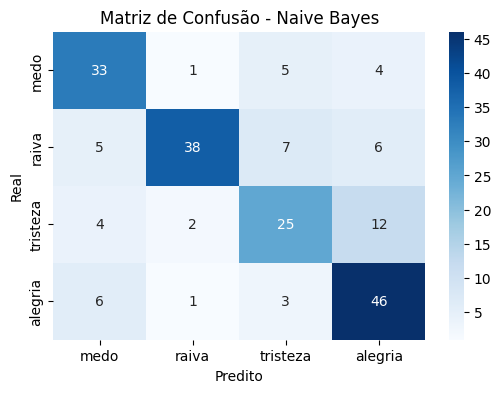

=== Regressão Logística ===
              precision    recall  f1-score   support

     alegria       0.62      0.88      0.73        56
        medo       0.65      0.72      0.68        43
       raiva       0.94      0.59      0.73        56
    tristeza       0.67      0.56      0.61        43

    accuracy                           0.69       198
   macro avg       0.72      0.69      0.69       198
weighted avg       0.73      0.69      0.69       198



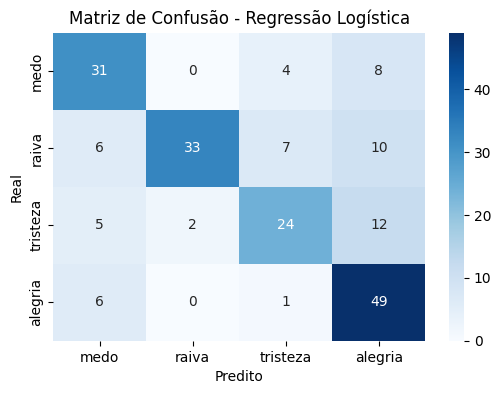

=== Random Forest ===
              precision    recall  f1-score   support

     alegria       0.78      0.62      0.69        56
        medo       0.72      0.49      0.58        43
       raiva       0.96      0.43      0.59        56
    tristeza       0.35      0.81      0.49        43

    accuracy                           0.58       198
   macro avg       0.70      0.59      0.59       198
weighted avg       0.73      0.58      0.60       198



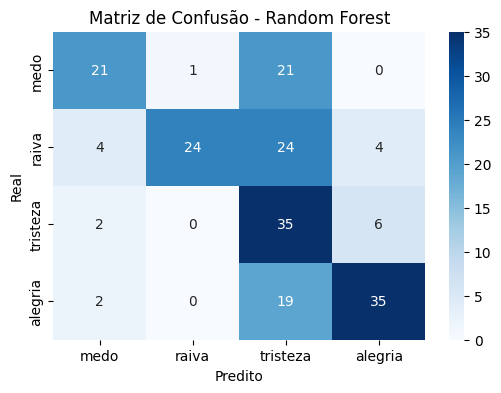

=== GradientBoostingClassifier ===
              precision    recall  f1-score   support

     alegria       0.78      0.52      0.62        56
        medo       0.68      0.40      0.50        43
       raiva       0.96      0.45      0.61        56
    tristeza       0.34      0.86      0.48        43

    accuracy                           0.55       198
   macro avg       0.69      0.56      0.55       198
weighted avg       0.71      0.55      0.56       198



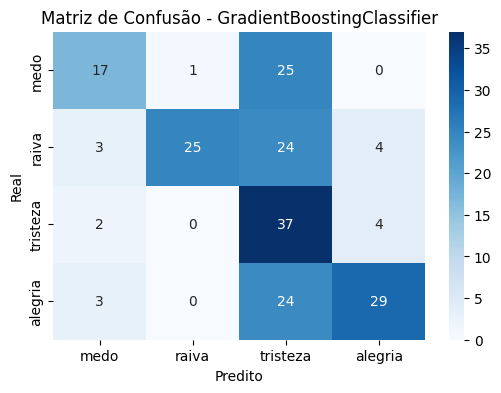

=== SGDClassifier ===
              precision    recall  f1-score   support

     alegria       0.76      0.61      0.67        56
        medo       0.69      0.51      0.59        43
       raiva       0.96      0.45      0.61        56
    tristeza       0.37      0.81      0.51        43

    accuracy                           0.59       198
   macro avg       0.69      0.59      0.59       198
weighted avg       0.71      0.59      0.60       198



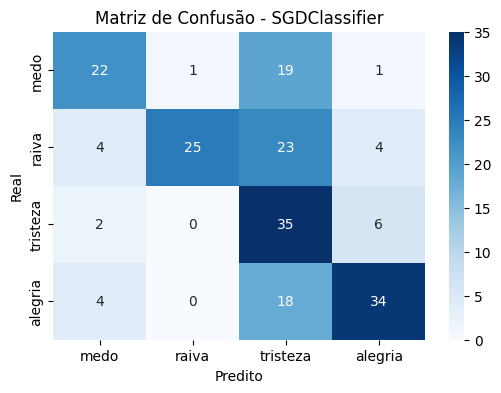

In [ ]:
print("=== Naive Bayes ===")
print(classification_report(y_teste, y_pred_nb))
plotar_matriz_confusao(y_teste, y_pred_nb, "Naive Bayes")

print("=== Regressão Logística ===")
print(classification_report(y_teste, y_pred_lr))
plotar_matriz_confusao(y_teste, y_pred_lr, "Regressão Logística")

print("=== Random Forest ===")
print(classification_report(y_teste, y_pred_rf))
plotar_matriz_confusao(y_teste, y_pred_rf, "Random Forest")

print("=== GradientBoostingClassifier ===")
print(classification_report(y_teste, y_pred_gdb))
plotar_matriz_confusao(y_teste, y_pred_gdb, "GradientBoostingClassifier")

print("=== SGDClassifier ===")
print(classification_report(y_teste, y_pred_sgd))
plotar_matriz_confusao(y_teste, y_pred_sgd, "SGDClassifier")

#Teste com Frases

In [ ]:
def testar_frase(frase):
    frase_limpa = limpatexto(frase)
    frase_vet = vetorizador.transform([frase_limpa])

    pred_nb = modelo_nb.predict(frase_vet)[0]
    pred_lr = modelo_lr.predict(frase_vet)[0]
    pred_rf = modelo_rf.predict(frase_vet)[0]
    pred_gdb = modelo_gdb.predict(frase_vet)[0]
    pred_sgd = modelo_sgd.predict(frase_vet)[0]

    print(f'Frase: "{frase}"')
    print(f'Previsão Naive Bayes: {pred_nb}')
    print(f'Previsão Regressão Logística: {pred_lr}')
    print(f'Previsão Random Forest: {pred_rf}')
    print(f'Previsão GradientBoosting Classifier: {pred_gdb}')
    print(f'Previsão SGDC Classifier: {pred_sgd}')

#Teste com Frases sólidas

In [ ]:
nova_frase = "Esse sorvete é muito bom e eu adorei!"
testar_frase(nova_frase)

Frase: "Esse sorvete é muito bom e eu adorei!"
Previsão Naive Bayes: alegria
Previsão Regressão Logística: alegria
Previsão Random Forest: alegria
Previsão GradientBoosting Classifier: alegria
Previsão SGDC Classifier: alegria


In [ ]:
nova_frase = "Eu amo python!"
testar_frase(nova_frase)

Frase: "Eu amo python!"
Previsão Naive Bayes: tristeza
Previsão Regressão Logística: alegria
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza


In [ ]:
nova_frase = "Eu amo tentar coisas novas!"
testar_frase(nova_frase)

Frase: "Eu amo tentar coisas novas!"
Previsão Naive Bayes: tristeza
Previsão Regressão Logística: tristeza
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza


In [ ]:
nova_frase= "Odeio quando fazem isso comigo!"
testar_frase(nova_frase)

Frase: "Odeio quando fazem isso comigo!"
Previsão Naive Bayes: raiva
Previsão Regressão Logística: raiva
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza


In [ ]:
nova_frase= "Tenho medo do que vem pela frente"
testar_frase(nova_frase)

Frase: "Tenho medo do que vem pela frente"
Previsão Naive Bayes: medo
Previsão Regressão Logística: medo
Previsão Random Forest: medo
Previsão GradientBoosting Classifier: medo
Previsão SGDC Classifier: medo


In [ ]:
nova_frase= "Aquilo que me falaram me deixou muito triste"
testar_frase(nova_frase)

Frase: "Aquilo que me falaram me deixou muito triste"
Previsão Naive Bayes: tristeza
Previsão Regressão Logística: tristeza
Previsão Random Forest: tristeza
Previsão GradientBoosting Classifier: tristeza
Previsão SGDC Classifier: tristeza
